# Biểu đồ tròn, biểu đồ hộp, biểu đồ phân tán và biểu đồ bong bóng

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

## Khám phá tập dữ liệu với *pandas*

Tập dữ liệu: Nhập cư tới Canada từ 1980 tới 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) từ trang web của Liên Hợp Quốc.

## Download và chuẩn bị dữ liệu

### Download dữ liệu

In [2]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

### Clean dữ liệu

Loại bỏ dữ liệu không cần thiết

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

đặt lại tên các cột để dễ hiểu hơn

In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

Convert tên các cột sang string

In [7]:
df_can.columns = list(map(str, df_can.columns))

Đặt tên quốc gia làm index, tiện cho việc truy suất

In [8]:
df_can.set_index('Country', inplace=True) # Change the country column as index
df_can.index.name = None
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Thêm total

In [9]:
df_can['Total'] = df_can.sum(axis=1, numeric_only=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Tạo list years, tiện cho việc lấy dữ liệu.

In [10]:
years = list(map(str, range(1980, 2014)))

## Trực quan hóa dữ liệu với Matplotlib

In [11]:
mpl.style.use('ggplot')

### Biểu đồ tròn

`Biểu đồ tròn` là một đồ họa hình tròn hiển thị tỷ lệ số bằng cách chia hình tròn thành các phần theo tỷ lệ. Có thể bạn đã quen thuộc với biểu đồ tròn vì nó được sử dụng rộng rãi trong kinh doanh và truyền thông. Chúng ta có thể tạo biểu đồ tròn trong Matplotlib bằng cách truyền từ khóa `kind=pie` vào.

Hãy sử dụng biểu đồ tròn để tìm hiểu tỷ lệ (%) của những người nhập cư mới được nhóm theo lục địa trong khoảng thời gian từ 1980 đến 2013.

Chuẩn bị dữ liệu, sử dụng `groupby`

In [12]:
df_continent = df_can.groupby('Continent', axis=0).sum()
df_continent.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Vẽ biểu đồ dữ liệu. Chúng ta sẽ truyền vào từ khóa `kind='pie'` cùng với các tham số bổ sung sau:

-   `autopct` -  là một string hoặc hàm được sử dụng để gắn nhãn các wedget với giá trị số của chúng. Nhãn sẽ được đặt bên trong wedget. Nếu đó là định dạng string, nhãn sẽ là `fmt%pct`.
-   `startangle` - xoay phần bắt đầu của biểu đồ tròn theo độ góc ngược chiều kim đồng hồ so với trục x.
-   `shadow` - Vẽ bóng bên dưới biểu đồ tròn (để tạo cảm giác 3D).


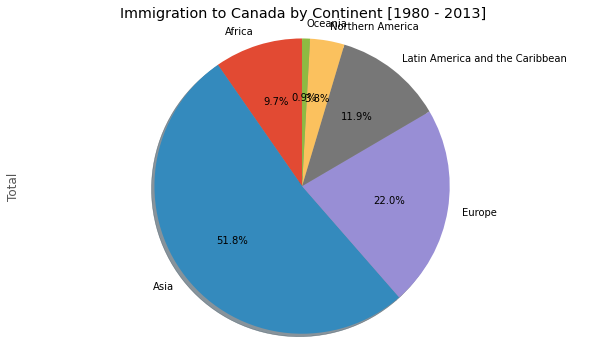

In [13]:
df_continent['Total'].plot(kind='pie', 
                           figsize=(10, 6),
                           autopct='%1.1f%%', # thêm %
                           startangle=90,     # bắt đầu góc 90° (Africa)
                           shadow=True    # thêm bóng  
                           )
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # thiết lập biểu đồ tròn để giống hình tròn 

plt.show()

<AxesSubplot:ylabel='Total'>

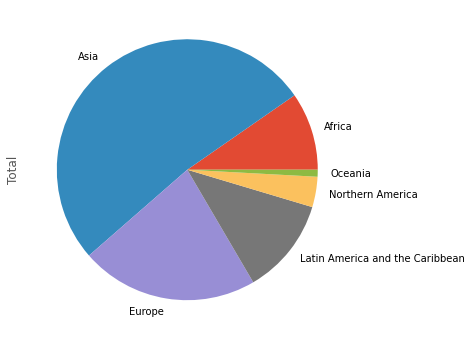

In [14]:
df_continent['Total'].plot(kind='pie', figsize=(10, 6))

Hình ảnh trên không được rõ ràng lắm, trong một số trường hợp, số và văn bản trùng lặp. Hãy thực hiện một số sửa đổi để cải thiện hình ảnh:

-   Xóa các nhãn văn bản trên biểu đồ tròn bằng cách chuyển vào `legend` và thêm nó dưới dạng chú giải riêng biệt bằng `plt.legend()`.
-   Đẩy tỷ lệ phần trăm nằm ngay bên ngoài biểu đồ tròn bằng cách chuyển vào tham số `pctdistance`.
-   Chuyển một tập màu tùy chỉnh cho các lục địa bằng cách chuyển vào tham số `color`.
-   **Explode** biểu đồ tròn để nhấn mạnh 3 lục địa thấp nhất (Châu Phi, Bắc Mỹ và Mỹ Latinh và Carribbean) bằng cách truyền vào tham số `explode`.

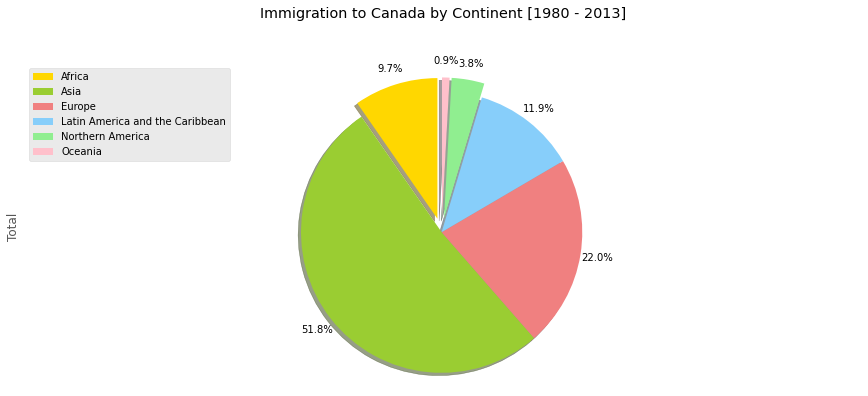

In [15]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # tỷ lệ cho mỗi lục địa để bù đắp mỗi wedge.

df_continent['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # tắt các nhãn trên biểu đồ tròn
                            pctdistance=1.12,    # tỷ lệ giữa tâm của mỗi lát biểu đồ và phần đầu của văn bản được tạo bởi autopct 
                            colors=colors_list,  # thêm màu tùy chỉnh
                            explode=explode_list # 'explode' 3 lục địa thấp nhất
                            )

# mở rộng tiêu đề lên 12% để khớp với pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# thêm legend
plt.legend(labels=df_continent.index, loc='upper left') 

plt.show()

**Câu hỏi:** Hãy tìm hiểu tỷ lệ (%) dân nhập cư mới theo các lục địa trong năm 2013 qua biểu đồ tròn.

**Lưu ý**: Bạn có thể thử với các giá trị để sửa bất kỳ giá trị lát chồng chéo nào.

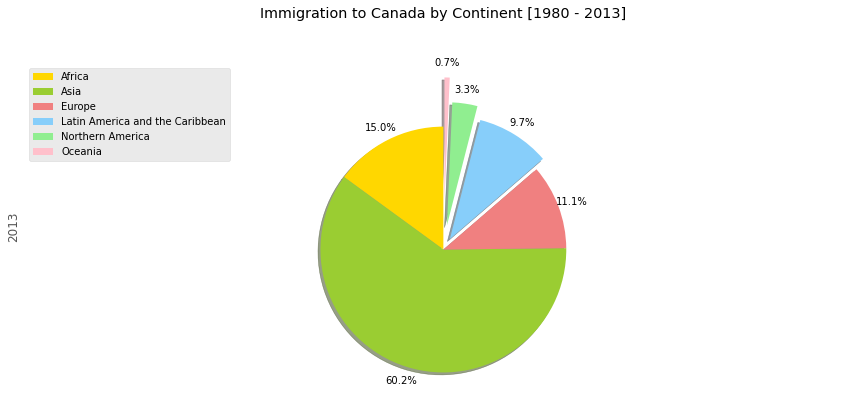

In [16]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0, 0.1, 0.2, 0.4] # tỷ lệ cho mỗi lục địa để bù đắp mỗi wedge.

df_continent['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # tắt các nhãn trên biểu đồ tròn
                            pctdistance=1.12,    # tỷ lệ giữa tâm của mỗi lát biểu đồ và phần đầu của văn bản được tạo bởi autopct 
                            colors=colors_list,  # thêm màu tùy chỉnh
                            explode=explode_list # 'explode' 3 lục địa thấp nhất
                            )

# mở rộng tiêu đề lên 12% để khớp với pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# thêm legend
plt.legend(labels=df_continent.index, loc='upper left') 

plt.show()

### Biểu đồ hộp

`Biểu đồ hộp` là một cách biểu diễn _phân phối_ của dữ liệu thông qua 5 thứ nguyên chính:

-   **Minimum (Cực tiểu):** Số nhỏ nhất trong tập dữ liệu không bao gồm các ngoại lệ.
- **First quartile (Phần tư thứ nhất):** Số chính giữa giá trị `minimum` và `median`.
- **Second quartile (Median):** Số chính giữa của tập dữ liệu (đã sắp xếp).
- **Third quartile (Phần tư thứ ba):** Số chính giữa `median` và `maximum`.
- **Maximum (Cực đại):** Số cao nhất trong tập dữ liệu không bao gồm các giá trị ngoại lệ.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width=440, align="center">

Để tạo một `biểu đồ hộp`, chúng ta có thể sử dụng `kind=box` trong phương thức `plot` được gọi trên chuỗi hoặc dataframe 
_pandas_ .


Hãy vẽ biểu đồ hộp cho những người nhập cư Nhật Bản trong giai đoạn 1980-2013.

In [17]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [18]:
df_japan = df_can.loc[['Japan'], years]
df_japan.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Japan,701,756,598,309,246,198,248,422,324,494,...,973,1067,1212,1250,1284,1194,1168,1265,1214,982


In [19]:
df_japan = df_japan.transpose()
df_japan

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246
1985,198
1986,248
1987,422
1988,324
1989,494


In [20]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


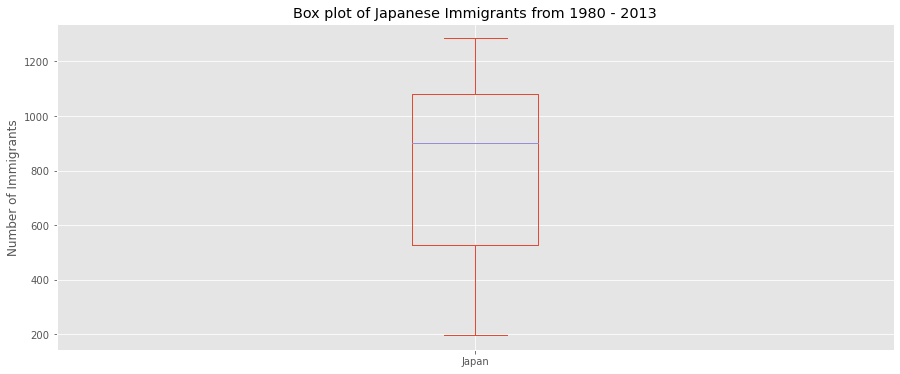

In [21]:
df_japan.plot(kind='box', figsize=(15, 6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Ngay lập tức, chúng ta có một vài quan sát chính từ biểu đồ trên:

1. Số lượng người nhập cư tối thiểu là khoảng 200 (min), số lượng tối đa là khoảng 1300 (max) và số lượng người nhập cư trung bình là khoảng 900 (median).
2. 25% số năm trong giai đoạn 1980 - 2013 có số lượng người nhập cư hàng năm là ~ 500 người trở xuống (First quartile).
3. 75% số năm trong giai đoạn 1980 - 2013 có số lượng người nhập cư hàng năm là ~ 1100 người trở xuống (Third quartile).

Một trong những lợi ích chính của biểu đồ hộp là so sánh sự phân bố của nhiều tập dữ liệu. Trong một trong các lab trước, chúng ta đã quan sát thấy Trung Quốc và Ấn Độ có xu hướng nhập cư rất giống nhau. Hãy phân tích thêm 2 quốc gia này bằng biểu đồ hộp.

**Câu hỏi:** So sánh sự phân bố số lượng người nhập cư mới từ Ấn Độ và Trung Quốc trong giai đoạn 1980-2013.

In [22]:
## Prepare data
df_ci = df_can.loc[['China', 'India'], years]
df_ci.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [23]:
df_ci = df_ci.transpose()
df_ci.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [24]:
df_ci.describe()

,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


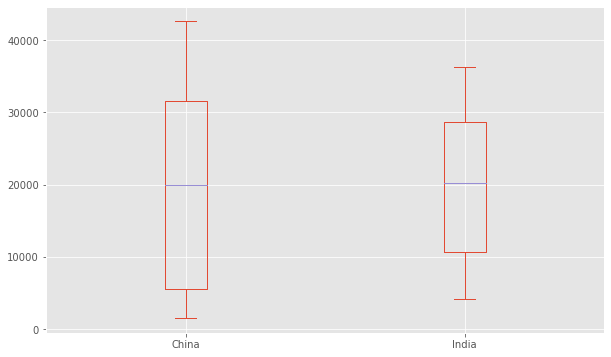

In [25]:
df_ci.plot(kind='box', figsize=(10,6))
plt.show()

Có thể chuyển sang biểu đồ ngang, dùng `vert` = `False` trong phương thức `plot`

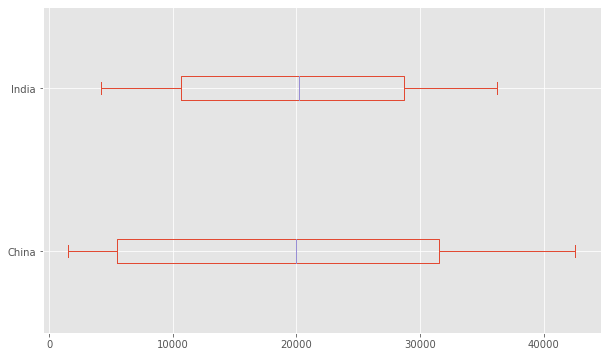

In [26]:
df_ci.plot(kind='box', figsize=(10,6), vert=False)
plt.show()

**Subplots**

Đôi khi chúng ta muốn vẽ nhiều biểu đồ trong cùng một hình. Ví dụ: chúng ta muốn thực hiện so sánh song song giữa biểu đồ hộp với biểu đồ đường biểu thị sự nhập cư của Trung Quốc và Ấn Độ.

Để hiển thị nhiều biểu đồ với nhau, chúng ta có thể tạo một **`figure`** (canvas tổng thể) và chia nó thành **`subplots`**, mỗi subplot chứa một biểu đồ. Với **subplots**, chúng ta thường làm việc với **lớp artist** thay vì **lớp scripting**.

Cú pháp thông thường là: <br>

```python
    fig = plt.figure() # tạo figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # tạo subplots
```

trong đó:

*   `nrows` và `ncols` được sử dụng để chia nhơ hình thành (`nrows` \* `ncols`) các trục con,
*   `plot_number` được dùng để xác định các subplot cụ thể mà hàm này tạo ra trong lưới giả định. `plot_number` bắt đầu từ 1, tăng dần trên các hàng và có tối đa `nrows` \* `ncols` như hiển thị bên dưới.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width=500 align="center">

*** Gợi ý liên quan đến quy ước subplot**

Trong trường hợp khi `nrows`,` ncols` và `plot_number` đều nhỏ hơn 10, thì có thể thay thế bằng số có 3 chữ số, trong đó hàng trăm biểu diễn `nrows`, hàng chục biểu diễn `ncols ` và hàng đơn vị biểu diễn `plot_number`. Ví dụ,

```python
   subplot(211) == subplot(2, 1, 1) 
```

tạo ra một trục con trong một hình đại diện cho biểu đồ trên cùng (tức là biểu đồ đầu tiên) trong một lưới giả định 2 hàng x 1 cột (thực tế không có lưới nào tồn tại, nhưng về mặt khái niệm thì đây là cách subplot trả về đã được sắp xếp).


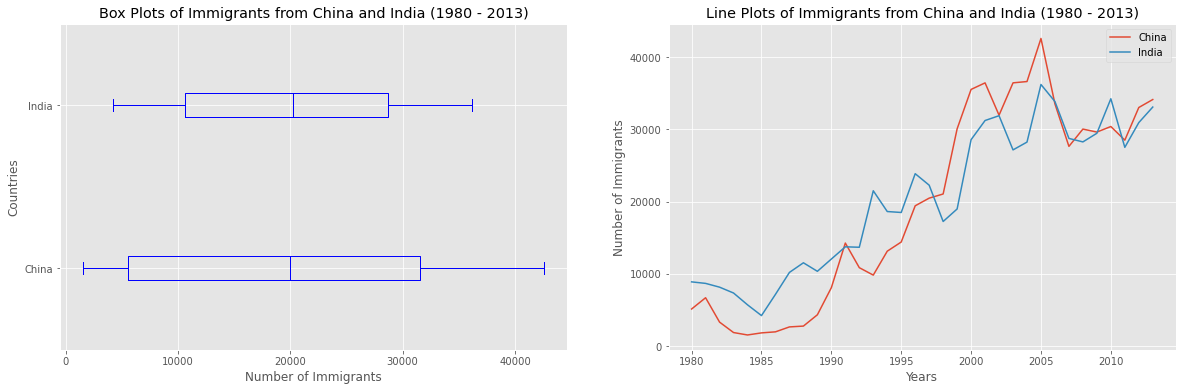

In [27]:
fig = plt.figure() # tạo figure

ax0 = fig.add_subplot(1, 2, 1) # thêm subplot 1 (1 hàng, 2 cột, biểu đồ đầu tiên)
ax1 = fig.add_subplot(1, 2, 2) # thêm subplot 2 (1 hàng, 2 cột, biểu đồ thứ hai). Xem gợi ý dưới đây**

# Subplot 1: Biểu đồ hộp
df_ci.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # thêm vào subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Biểu đồ đường
df_ci.plot(kind='line', figsize=(20, 6), ax=ax1) # thêm vào subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**Câu hỏi:** Tạo biểu đồ hộp để hình dung sự phân bố của top 15 quốc gia (dựa trên tổng số người nhập cư) được nhóm theo _thập kỷ_ `1980`,` 1990` và `2000`.


In [28]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [29]:
# Sort df_can follow Total column
df_can.sort_values('Total', ascending=True, inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5


In [30]:
df_can.tail()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


In [31]:
df_top15 = df_can.tail(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Romania,Europe,Eastern Europe,Developed regions,375,438,583,543,524,604,656,...,5048,4468,3834,2837,2076,1922,1776,1588,1512,93585
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Jamaica,Latin America and the Caribbean,Caribbean,Developing regions,3198,2634,2661,2455,2508,2938,4649,...,1945,1722,2141,2334,2456,2321,2059,2182,2479,106431
France,Europe,Western Europe,Developed regions,1729,2027,2219,1490,1169,1177,1298,...,4429,4002,4290,4532,5051,4646,4080,6280,5623,109091
Lebanon,Asia,Western Asia,Developing regions,1409,1119,1159,789,1253,1683,2576,...,3709,3802,3467,3566,3077,3432,3072,1614,2172,115359
Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,4808,...,1405,1263,1235,1267,1013,795,720,779,852,139241
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122


In [32]:
year80s = list(map(str, range(1980, 1990)))
year90s = list(map(str, range(1990, 2000)))
year00s = list(map(str, range(2000, 2010)))

In [33]:
df_80years = df_top15.loc[:, year80s]
df_80years

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
Romania,375,438,583,543,524,604,656,1202,1106,1582
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004
Jamaica,3198,2634,2661,2455,2508,2938,4649,5415,3924,3946
France,1729,2027,2219,1490,1169,1177,1298,1658,2038,2332
Lebanon,1409,1119,1159,789,1253,1683,2576,3803,3970,7157
Poland,863,2930,5881,4546,3588,2819,4808,6931,9211,16025
Republic of Korea,1011,1456,1572,1081,847,962,1208,2338,2805,2979
Sri Lanka,185,371,290,197,1086,845,1838,4447,2779,2758
Iran (Islamic Republic of),1172,1429,1822,1592,1977,1648,1794,2989,3273,3781
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790


In [34]:
df_80years['Total'] = df_80years.sum(axis=1, numeric_only=True)
df_80years

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,Total
Romania,375,438,583,543,524,604,656,1202,1106,1582,7613
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,30638
Jamaica,3198,2634,2661,2455,2508,2938,4649,5415,3924,3946,34328
France,1729,2027,2219,1490,1169,1177,1298,1658,2038,2332,17137
Lebanon,1409,1119,1159,789,1253,1683,2576,3803,3970,7157,24918
Poland,863,2930,5881,4546,3588,2819,4808,6931,9211,16025,57602
Republic of Korea,1011,1456,1572,1081,847,962,1208,2338,2805,2979,16259
Sri Lanka,185,371,290,197,1086,845,1838,4447,2779,2758,14796
Iran (Islamic Republic of),1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,21477
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,76824


In [35]:
df_90years = df_top15.loc[:, year90s]
df_90years['Total'] = df_90years.sum(axis=1, numeric_only=True)
df_90years

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,Total
Romania,2252,2337,3147,3676,3495,4279,3909,3993,3033,3538,33659
Viet Nam,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,37726
Jamaica,4945,5056,5991,6065,3913,3619,3282,2847,2253,2358,40329
France,2177,2911,3487,3709,2759,3332,2623,2473,3214,3343,30028
Lebanon,13568,12567,6915,4902,2751,2228,1919,1472,1329,1594,49245
Poland,17040,16028,12145,6960,3550,2405,2136,1758,1488,1354,64864
Republic of Korea,2087,2598,3790,3819,3005,3501,3250,4093,4938,7108,38189
Sri Lanka,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,70421
Iran (Islamic Republic of),3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,54871
United States of America,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,56915


In [36]:
df_00years = df_top15.loc[:, year00s]
df_00years['Total'] = df_00years.sum(axis=1, numeric_only=True)
df_00years

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,Total
Romania,4539,5652,5765,5541,5755,5048,4468,3834,2837,2076,45515
Viet Nam,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,21274
Jamaica,2482,2838,2524,2054,2237,1945,1722,2141,2334,2456,22733
France,3765,3806,3463,3568,4391,4429,4002,4290,4532,5051,41297
Lebanon,1903,2578,2332,3179,3293,3709,3802,3467,3566,3077,30906
Poland,1471,1601,1447,1394,1533,1405,1263,1235,1267,1013,13629
Republic of Korea,7618,9619,7342,7117,5352,5832,6215,5920,7294,5874,68183
Sri Lanka,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,49678
Iran (Islamic Republic of),5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,65794
United States of America,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,75173


In [37]:
new_df = pd.DataFrame({'80s': df_80years['Total'],'90s': df_90years['Total'], '00s': df_00years['Total']})
new_df

,80s,90s,00s
Romania,7613,33659,45515
Viet Nam,30638,37726,21274
Jamaica,34328,40329,22733
France,17137,30028,41297
Lebanon,24918,49245,30906
Poland,57602,64864,13629
Republic of Korea,16259,38189,68183
Sri Lanka,14796,70421,49678
Iran (Islamic Republic of),21477,54871,65794
United States of America,76824,56915,75173


In [38]:
new_df.describe()

,80s,90s,00s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


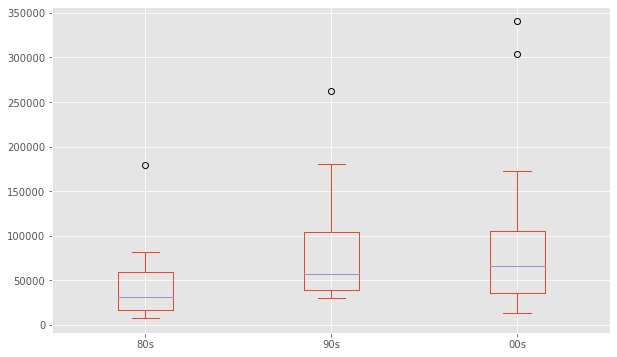

In [39]:
new_df.plot(kind='box', figsize=(10, 6))
plt.show()

Lưu ý rằng biểu đồ hộp khác với bảng tóm tắt đã tạo. Biểu đồ hộp quét dữ liệu và xác định các giá trị ngoại lệ (outlier). Để trở thành ngoại lệ, giá trị dữ liệu phải: <br>

- lớn hơn Q3 ít nhất 1,5 lần IQR, hoặc,
- nhỏ hơn Q1 ít nhất 1,5 lần IQR.

Hãy lấy thập niên 2000 làm ví dụ: <br>

- Q1 (25%) = 36.101,5 <br>
- Quý 3 (75%) = 105.505,5 <br>
- IQR = Q3 - Q1 = 69.404 <br>

Sử dụng định nghĩa của giá trị ngoại lệ, bất kỳ giá trị nào lớn hơn Q3 1,5 lần IQR sẽ được gắn cờ là giá trị ngoại lệ.

Outlier > 105.505,5 + (1,5 * 69,404) <br>
Outlier > 209.611,5

In [40]:
new_df
new_df[new_df['00s'] > 209611.5]

,80s,90s,00s
China,32003,161528,340385
India,82154,180395,303591


Cả Trung Quốc và Ấn Độ đều được coi là ngoại lệ vì dân số của họ trong thập kỷ vượt quá 209.611,5.

Biểu đồ hộp là một công cụ trực quan hóa nâng cao có nhiều tùy chọn và tùy chỉnh vượt qua phạm vi của lab này. Vui lòng tham khảo [tài liệu Matplotlib](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) về biểu đồ hộp để biết thêm thông tin.

### Biểu đồ phân tán

`Biểu đồ phân tán` (2D) là một phương pháp hữu ích để so sánh các `biến` với nhau. Biểu đồ `phân tán` trông giống như `biểu đồ đường` ở chỗ chúng đều ánh xạ các biến độc lập và phụ thuộc trên biểu đồ 2D. Trong khi ở biểu đồ đường, các điểm dữ liệu được kết nối với nhau bằng một đường thì ở biểu đồ phân tán, `chúng không được kết nối`. Dữ liệu trong biểu đồ phân tán được coi là biểu diễn một xu hướng. Nhờ phân tích sâu hơn với các công cụ như hồi quy, chúng ta có thể tính toán mối liên hệ này và sử dụng nó để dự đoán các xu hướng ngoài tập dữ liệu.

Hãy bắt đầu bằng việc khám phá những điều sau:

Sử dụng `biểu đồ phân tán`, hãy hình dung xu hướng tổng số người nhập cư đến Canada (tất cả các quốc gia cộng lại) trong những năm 1980-2013.


In [41]:
s_sum = df_can.sum(axis=0, numeric_only=True)
s_sum

1980       99137
1981      110563
1982      104271
1983       75550
1984       73417
1985       69978
1986       86048
1987      134771
1988      139306
1989      164432
1990      188054
1991      207509
1992      221687
1993      222049
1994      193665
1995      187712
1996      200085
1997      192885
1998      160727
1999      179818
2000      216712
2001      242643
2002      223111
2003      217297
2004      232083
2005      257457
2006      247057
2007      232405
2008      243047
2009      248768
2010      276956
2011      246194
2012      256222
2013      257537
Total    6409153
dtype: int64

In [42]:
type(s_sum)

pandas.core.series.Series

In [43]:
df_sum = pd.DataFrame(s_sum)

In [44]:
df_sum.reset_index(inplace=True)

In [45]:
df_sum.columns = ['year', 'total']
df_sum.head()


,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


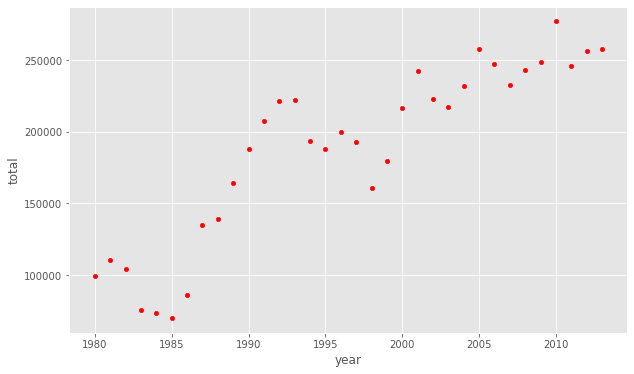

In [46]:
df_sum.drop(df_sum.index[-1], inplace=True)
df_sum['year'] = pd.to_numeric(df_sum['year'])
df_sum.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='red')
plt.show()

In [47]:
x = df_sum['year']      # year trên trục x
y = df_sum['total']     # total trên trục y
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

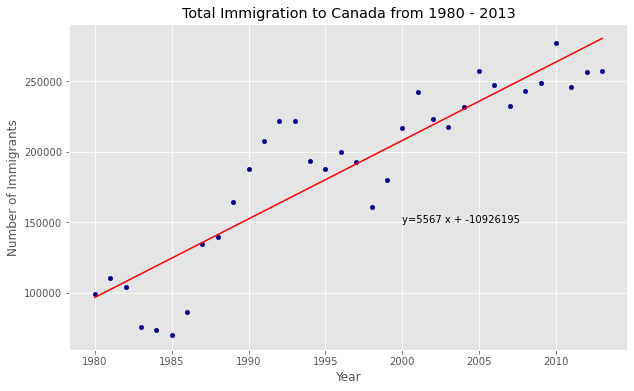

'No. Immigrants = 5567 * Year + -10926195'

In [48]:
df_sum.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# đường biểu đồ phù hợp nhất
plt.plot(x, fit[0] * x + fit[1], color='red') # nhắc lại x là Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# in ra đường phù hợp nhất
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Câu hỏi: Tạo biểu đồ phân tán về tổng số người nhập cư từ Đan Mạch, Na Uy và Thụy Điển đến Canada từ năm 1980 đến năm 2013.

Bước 1: Thu thập dữ liệu:

1. Tạo dataframe chỉ gồm các số liệu liên quan đến Đan Mạch, Na Uy và Thụy Điển. Đặt tên cho dataframe này là **df_countries**.
2. Tính tổng số người nhập cư trên cả 3 quốc gia mỗi năm và chuyển kết quả thành dataframe. Đặt tên cho dataframe mới này là **df_total**.
3. Đặt lại chỉ mục tại chỗ.
4. Đổi tên các cột thành **year** và **total**.
5. Hiển thị kết quả dataframe.

In [49]:
df_can.head()
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries.head()

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [50]:
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.head()

,0
1980,669
1981,678
1982,627
1983,333
1984,252


In [51]:
df_total.reset_index(inplace=True)

In [52]:
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Bước 2: Tạo biểu đồ phân tán bằng cách vẽ biểu đồ tổng so với năm trong **df_total**.

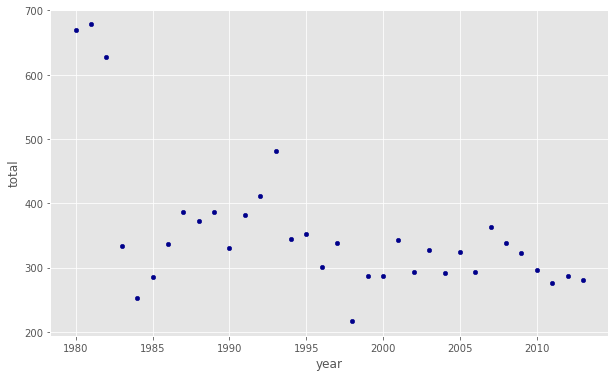

In [53]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.show()

### Biểu đồ bong bóng <a id="12"></a>

`Biểu đồ bong bóng` là một biến thể của` biểu đồ phân tán`, hiển thị 3 chiều của dữ liệu (x, y, z). Các điểm dữ liệu được thay thế bằng bong bóng và kích thước của bong bóng được xác định bởi biến thứ ba `z`, hay còn được gọi là trọng số. Trong `maplotlib`, chúng ta có thể chuyển  từ khóa `s` thành `plot()`, chứa trọng số của mỗi điểm trong một mảng hoặc vô hướng.

**Hãy bắt đầu bằng cách phân tích ảnh hưởng của đại suy thoái ở Argentina**.

Argentina đã trải qua một cuộc khủng hoảng nghiêm trọng từ năm 1998 - 2002, gây ra tình trạng thất nghiệp, bạo loạn, sự sụp đổ của chính phủ và vỡ nợ nước ngoài. Về thu nhập, hơn 50% người dân Argentina là người nghèo, và cứ 10 trẻ em thì có 7 trẻ em nghèo trong cuộc khủng hoảng năm 2002.

Hãy phân tích tác động của cuộc khủng hoảng này và so sánh việc nhập cư của Argentina với người láng giềng Brazil. Hãy thực hiện bằng cách sử dụng `biểu đồ bong bóng` về lượng người nhập cư từ Brazil và Argentina trong những năm 1980 - 2013. Chúng ta sẽ đặt trọng số cho bong bóng là giá trị _chuẩn hóa_ của dân số mỗi năm.

Bước 1: Lấy dữ liệu cho Brazil và Argentina. Giống như ví dụ trước, chúng ta sẽ chuyển đổi `Years` thành kiểu int và đưa nó vào dataframe.

In [54]:
df_can.head(1)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [55]:
df_ab = df_can.loc[['Brazil', 'Argentina'], years].transpose()

In [56]:
df_ab.index = df_ab.index.astype(int)
df_ab.index.name = 'Year'
df_ab.reset_index(inplace=True)
df_ab.head()

,Year,Brazil,Argentina
0,1980,211,368
1,1981,220,426
2,1982,192,626
3,1983,139,241
4,1984,145,237


Bước 2: Tạo trọng số chuẩn hóa.

Trong thống kê có một số phương pháp chuẩn hóa, mỗi phương pháp có cách sử dụng riêng. Trong trường hợp này, chúng ta sẽ sử dụng [Feature scaling - tính năng mở rộng quy mô](https://en.wikipedia.org/wiki/Feature_scaling?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) để đưa tất cả các giá trị vào phạm vi [0,1]. Công thức chung là:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

trong đó: _`X`_ là giá trị ban đầu, _`X'`_ là giá trị chuẩn hóa. Công thức đặt giá trị tối đa trong tập dữ liệu là 1 và giá trị nhỏ nhất là 0. Phần còn lại của tập dữ liệu được chia tỷ lệ thành giá trị từ 0-1 cho phù hợp.

In [57]:
norm_brazil = (df_ab['Brazil'] - df_ab['Brazil'].min()) / (df_ab['Brazil'].max() - df_ab['Brazil'].min())
norm_argentina = (df_ab['Argentina'] - df_ab['Argentina'].min()) / (df_ab['Argentina'].max() - df_ab['Argentina'].min())

Bước 3: Vẽ biểu đồ dữ liệu.

- Để vẽ hai biểu đồ phân tán khác nhau trong một biểu đồ, chúng ta có thể gộp các trục của biểu đồ này vào biểu đồ kia bằng cách chuyển nó qua tham số `ax`.
- Chúng ta cũng sẽ truyền trọng số bằng tham số `s`. Biết rằng các trọng số chuẩn hóa nằm trong khoảng từ 0-1, chúng sẽ không hiển thị trên biểu đồ. Do đó chúng ta sẽ:
     - nhân trọng số với 2000 để tăng tỷ lệ trên biểu đồ và,
     - thêm 10 để bù cho giá trị min (có trọng số 0 và do đó chia tỷ lệ với x2000).

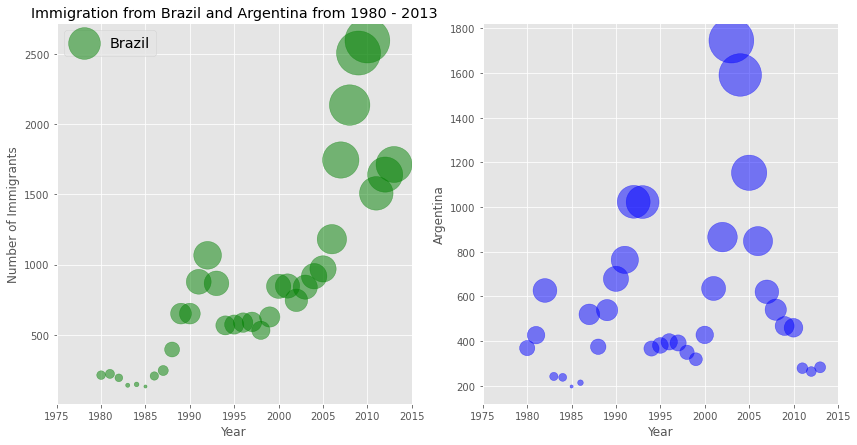

In [58]:
fig = plt.figure() # tạo figure

ax0 = fig.add_subplot(1, 2, 1) # thêm subplot 1 (1 hàng, 2 cột, biểu đồ đầu tiên)
ax1 = fig.add_subplot(1, 2, 2) # thêm subplot 2 (1 hàng, 2 cột, biểu đồ thứ hai). 

ax0 = df_ab.plot(ax=ax0, 
                 kind='scatter', 
                 x='Year', 
                 y='Brazil', 
                 figsize=(14, 7), 
                 color='green', 
                 marker='o', 
                 alpha=0.5,
                 s=norm_brazil * 2000 + 10,  # truyền các trọng số 
                 xlim=(1975, 2015))

ax1 = df_ab.plot(ax=ax1, 
                 kind='scatter', 
                 x='Year', 
                 y='Argentina', 
                 figsize=(14, 7), 
                 color='blue', 
                 marker='o', 
                 alpha=0.5,
                 s=norm_argentina * 2000 + 10,  # truyền các trọng số 
                 xlim=(1975, 2015))

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

Kích thước của bong bóng tương ứng với mức độ dân số nhập cư trong năm đó, so với dữ liệu 1980-2013. Bong bóng càng lớn thì số lượng người nhập cư trong năm đó càng nhiều.

Từ biểu đồ trên, chúng ta có thể thấy lượng nhập cư từ Argentina gia tăng tương ứng trong cuộc đại suy thoái 1998 - 2002. Chúng ta cũng có thể quan sát thấy một đợt tăng đột biến tương tự vào khoảng năm 1985 đến 1993. Trên thực tế, Argentina đã phải trải qua một cuộc đại suy thoái từ 1974-1990, ngay trước khi bắt đầu cuộc đại suy thoái 1998-2002.

Cũng vậy, Brazil đã phải hứng chịu _Hiệu ứng Samba_ khi đồng real Brazil (tiền tệ) giảm gần 35% vào năm 1999. Người ta lo ngại về một cuộc khủng hoảng tài chính Nam Mỹ vì nhiều nước Nam Mỹ phụ thuộc khá nhiều vào xuất khẩu công nghiệp từ Brazil. Sau đó chính phủ Brazil đã thông qua một chương trình thắt lưng buộc bụng và nền kinh tế dần phục hồi trong những năm qua, đỉnh điểm là sự tăng vọt vào năm 2010. Dữ liệu nhập cư phản ánh những sự kiện này.


**Câu hỏi**: Vừa rồi trong lab này, chúng ta đã tạo các biểu đồ hộp để so sánh lượng nhập cư từ Trung Quốc và Ấn Độ đến Canada. Tạo biểu đồ bong bóng về nhập cư từ Trung Quốc và Ấn Độ để hình dung các khác biệt theo thời gian từ năm 1980 đến năm 2013. Bạn có thể sử dụng **df_can_t** đã xác định và sử dụng trong ví dụ trước.

Bước 1: Chuẩn hóa dữ liệu liên quan đến Trung Quốc và Ấn Độ.

In [59]:
df_can.head(1)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [60]:
df_ci = df_can.loc[['China', 'India'], years]
df_ci = df_ci.transpose()
df_ci.index.name = 'Year'
df_ci.index = df_ci.index.astype(int)
df_ci.reset_index(inplace=True)
df_ci

,Year,China,India
0,1980,5123,8880
1,1981,6682,8670
2,1982,3308,8147
3,1983,1863,7338
4,1984,1527,5704
5,1985,1816,4211
6,1986,1960,7150
7,1987,2643,10189
8,1988,2758,11522
9,1989,4323,10343


In [61]:
norm_china = (df_ci['China'] - df_ci['China'].min()) / (df_ci['China'].max() - df_ci['China'].min())
norm_india = (df_ci['India'] - df_ci['India'].min()) / (df_ci['India'].max() - df_ci['India'].min())

Bước 2: Tạo biểu đồ bong bóng.

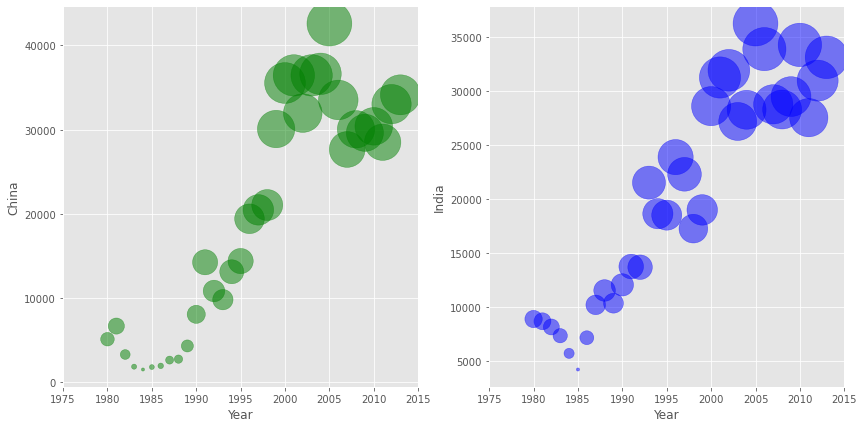

In [62]:
fig = plt.figure() # tạo figure
ax0 = fig.add_subplot(1, 2, 1) # thêm subplot 1 (1 hàng, 2 cột, biểu đồ đầu tiên)
ax1 = fig.add_subplot(1, 2, 2)

ax0 = df_ci.plot(ax=ax0,
                 kind='scatter', 
                 x='Year', 
                 y='China', 
                 figsize=(14, 7), 
                 color='green', 
                 marker='o', 
                 alpha=0.5, 
                 s=norm_china * 2000 + 10, 
                 xlim=(1975, 2015))

ax1 = df_ci.plot(ax=ax1,
                 kind='scatter',
                 x='Year',
                 y='India',
                 figsize=(14, 7),
                 color='blue',
                 marker='o',
                 alpha=0.5,s=norm_india * 2000 + 10,
                 xlim=(1975, 2015))